In [1]:
!pip install statsmodels
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
file_path = 'Downloads/house_price_regression_dataset.csv'
df = pd.read_csv(file_path)

# Part 1: Exploratory Data Analysis

In [2]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [3]:
df.dtypes

Square_Footage            int64
Num_Bedrooms              int64
Num_Bathrooms             int64
Year_Built                int64
Lot_Size                float64
Garage_Size               int64
Neighborhood_Quality      int64
House_Price             float64
dtype: object

In [4]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


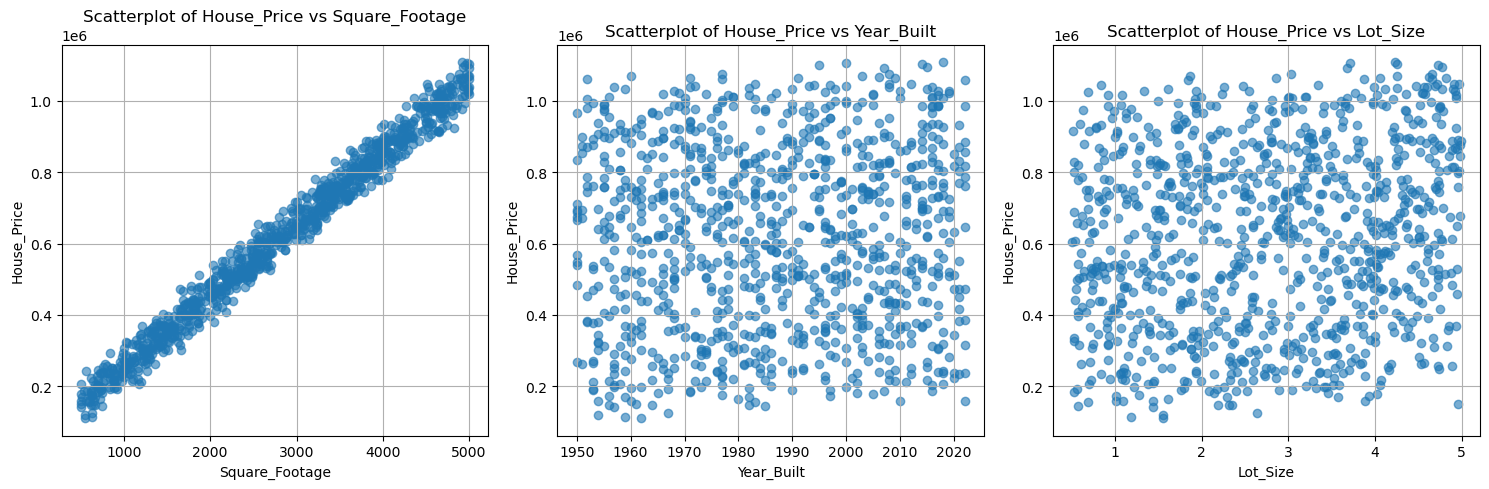

In [5]:
columns = [('Square_Footage', 'House_Price'), ('Year_Built', 'House_Price'), ('Lot_Size', 'House_Price')]

fig, axes = plt.subplots(nrows=1, ncols = len(columns), figsize=(15, 5))

for ax, (x_col, y_col) in zip(axes, columns):
    ax.scatter(df[x_col], df[y_col], alpha=0.6)
    ax.set_title(f'Scatterplot of {y_col} vs {x_col}')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(True)

plt.tight_layout()
plt.show()

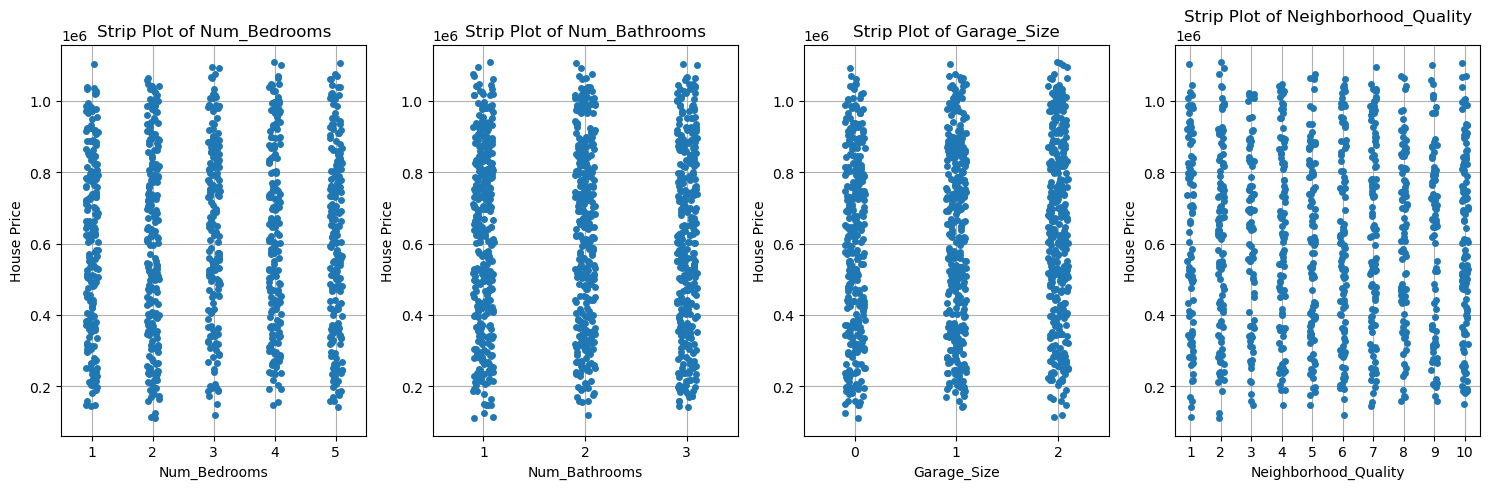

In [6]:
columns2 = ['Num_Bedrooms','Num_Bathrooms', 'Garage_Size', 'Neighborhood_Quality']

fig, axes = plt.subplots(nrows=1, ncols = len(columns2), figsize=(15, 5))

for ax, col in zip(axes, columns2):
    sns.stripplot(data=df, x = col, y = 'House_Price', ax=ax)
    ax.set_title(f'Strip Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('House Price')
    ax.grid(True)

plt.tight_layout()
plt.show()

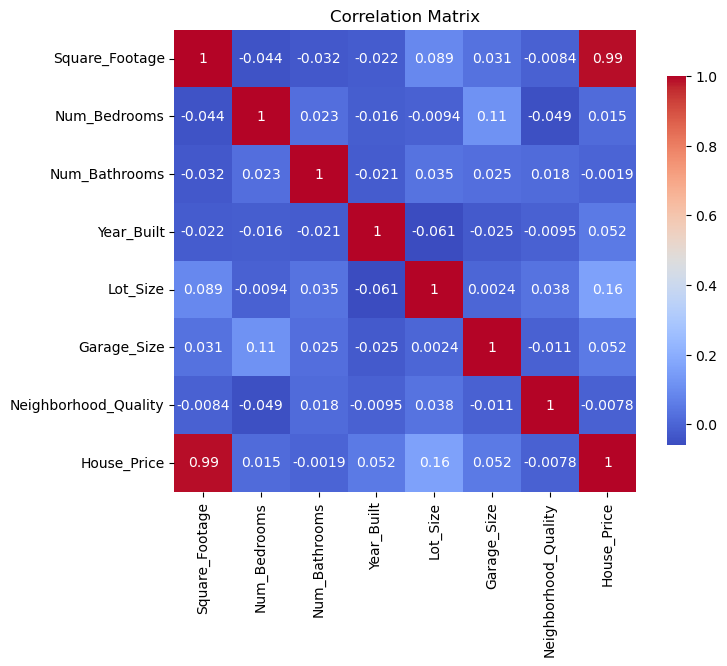

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

Square footage is very highly correlated with house price, so we will later test whether or not other predictors are useful in the model and if they should be removed.

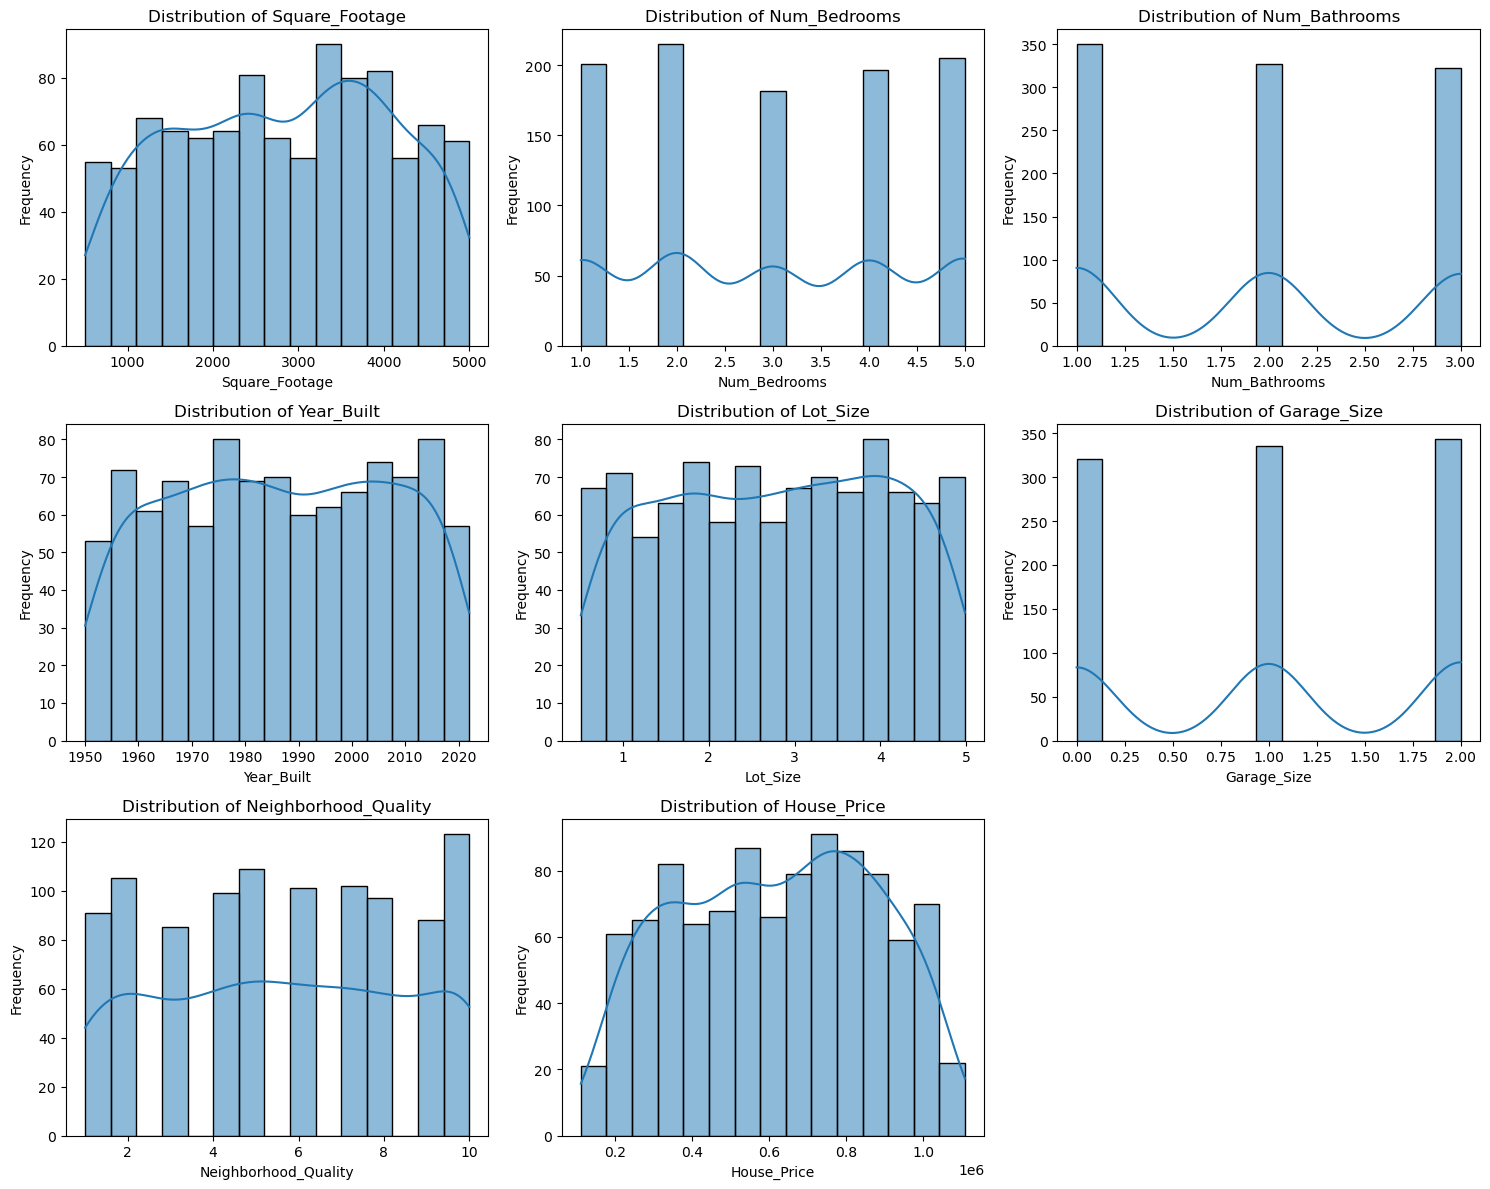

In [8]:
num_cols = df.shape[1]
nrows = (num_cols + 2) // 3  

fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 4))


axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], bins=15, kde=True, ax=axes[i]) 
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

# Part 2: Model Building

In [9]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

In [10]:
X = df[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']]
Y = df['House_Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

scalerX = StandardScaler()
scalerY = StandardScaler()

X_train_scale = scalerX.fit_transform(X_train)
X_test_scale = scalerX.transform(X_test)

Y_train_reshaped = Y_train.values.reshape(-1, 1)
Y_test_reshaped = Y_test.values.reshape(-1, 1)

Y_train_scale = scalerY.fit_transform(Y_train_reshaped)
Y_test_scale = scalerY.transform(Y_test_reshaped)

lre = LinearRegression()
lre.fit(X_train_scale, Y_train_scale)

Y_predictions_scale = lre.predict(X_test_scale)

r2 = r2_score(Y_test_scale, Y_predictions_scale)

print("Linear Regression Model Summary:")
print("------------------------------------------------")
print(f"Coefficients: {lre.coef_}")
print(f"Intercept: {lre.intercept_}")
print(f'r2 score:', r2)
print("------------------------------------------------") 

Linear Regression Model Summary:
------------------------------------------------
Coefficients: [[0.99134681 0.05663755 0.02602387 0.08102192 0.07655834 0.01354256
  0.00209874]]
Intercept: [-5.96285231e-16]
r2 score: 0.998528286227121
------------------------------------------------


In [11]:
from statsmodels.formula.api import ols

col_names = ['Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']

for name in col_names:
    full_model = ols(f'House_Price ~ Square_Footage + {name}', data=df).fit()
    reduced_model = ols('House_Price ~ Square_Footage', data=df).fit()
    f_test = full_model.compare_f_test(reduced_model)
    print(f'Does {name} explain a significant amount of variability in House Price given Square_Footage is already in the model?')
    print(f'F-statistic: {f_test[0]}')
    print(f'P-value: {f_test[1]}')
    print(f'Degrees of freedom: {f_test[2]}')
    if f_test[1] < 0.05:
        print('Yes!')
    else:
        print('No.')
    print()
    

Does Num_Bedrooms explain a significant amount of variability in House Price given Square_Footage is already in the model?
F-statistic: 237.62803077638895
P-value: 3.0010397340871806e-48
Degrees of freedom: 1.0
Yes!

Does Num_Bathrooms explain a significant amount of variability in House Price given Square_Footage is already in the model?
F-statistic: 52.33815630280229
P-value: 9.306559453284673e-13
Degrees of freedom: 1.0
Yes!

Does Year_Built explain a significant amount of variability in House Price given Square_Footage is already in the model?
F-statistic: 461.1457299511834
P-value: 2.219743026173398e-84
Degrees of freedom: 1.0
Yes!

Does Lot_Size explain a significant amount of variability in House Price given Square_Footage is already in the model?
F-statistic: 423.1267217124539
P-value: 1.1991428014077856e-78
Degrees of freedom: 1.0
Yes!

Does Garage_Size explain a significant amount of variability in House Price given Square_Footage is already in the model?
F-statistic: 28.0412

Given Square_Footage is already in the model, the only regressor that does not add any predictive power is Neighborhood_Quality so this regressor will be removed.

In [12]:
X2 = df[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size']]
Y2 = df['House_Price']

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = 0.3, random_state = 0)

scalerX2 = StandardScaler()
scalerY2 = StandardScaler()

X_train_scale2 = scalerX.fit_transform(X_train2)
X_test_scale2 = scalerX.transform(X_test2)

Y_train_reshaped2 = Y_train2.values.reshape(-1, 1)
Y_test_reshaped2 = Y_test2.values.reshape(-1, 1)

Y_train_scale2 = scalerY2.fit_transform(Y_train_reshaped2)
Y_test_scale2 = scalerY2.transform(Y_test_reshaped2)

lre2 = LinearRegression()
lre2.fit(X_train_scale2, Y_train_scale2)

Y_predictions_scale2 = lre2.predict(X_test_scale2)

r2_2 = r2_score(Y_test_scale2, Y_predictions_scale2)

print("Linear Regression Model Summary:")
print("------------------------------------------------")
print(f"Coefficients: {lre2.coef_}")
print(f"Intercept: {lre2.intercept_}")
print(f'r2 score:', r2_2)
print("------------------------------------------------")

Linear Regression Model Summary:
------------------------------------------------
Coefficients: [[0.99128789 0.05652678 0.02607219 0.08092535 0.07651148 0.01357833]]
Intercept: [-5.95593115e-16]
r2 score: 0.998543090690995
------------------------------------------------


Square_Footage has a much stronger correlation with House_Price compared to the other predictors, and and all remaining predictors are significant in adding predictive power given Square_Footage is already in the model. Figuring out the perfectly optimal combination of regressors for the model (given Square_Footage) would barely improve the model any further because such a large proportion of the variation in House_Price is explained by Square_Footage, so for the purposes of this project the model is acceptable as is.

# Part 3: Model Validation

In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lre2, X2, Y2, cv=5)  

print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.99846461 0.99848836 0.99849757 0.99846003 0.99854493]
Mean Score: 0.9984910989650924
Standard Deviation: 3.0375736918043432e-05


Due to the nature of the data, it is reasonable to expect such a high mean R2 score for the model, since Square_Footage was so highly correlated with House_Price on its own.

### Checking for Constant Variance and Normality of Errors:

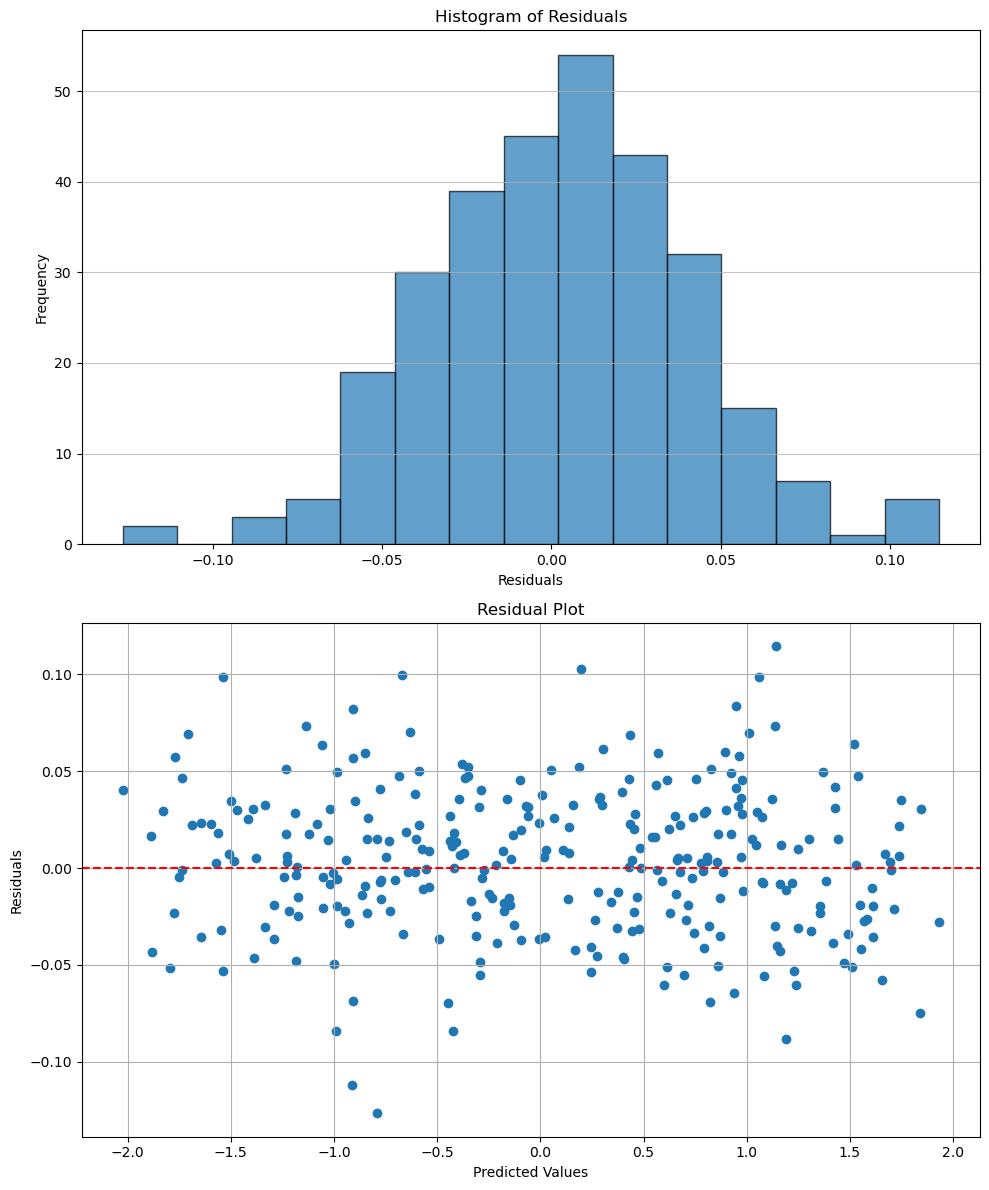

In [18]:
residuals = Y_test_scale2 - Y_predictions_scale2
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

axs[0].hist(residuals, bins=15, edgecolor='k', alpha=0.7)
axs[0].set_title('Histogram of Residuals')
axs[0].set_xlabel('Residuals')
axs[0].set_ylabel('Frequency')
axs[0].grid(axis='y', alpha=0.75)

axs[1].scatter(Y_predictions_scale2, residuals)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residual Plot')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')
axs[1].grid()

plt.tight_layout()
plt.show()

The histogram shows that the residuals are approximately distributed normally with mean 0, and the residual plot shows random scatter with no discernable pattern so both of these conditions are satisfied.